In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from classes.QLearningAgentClass import QLearningAgent
from envs.createEnvs import createNNEnv
from utilities.plots import create_grids, plot_trajectory
from utilities.jsonRW import writeJSON, readJSON

In [2]:
shape="5x5"

env = createNNEnv(shape)

Loading models...
Models loaded


In [3]:
# hyperparameters
if shape == "5x5":
    n_episodes = 5000
elif shape == "14x14":
    n_episodes = 15000


train = True            # train or test
show_stats = True       # show stats
export_to_JSON = False   # write JSON file
render = True           # render the results after training

NUM_AGENTS = 2

learning_rate = 0.02
start_epsilon = 1.0
epsilon_decay = start_epsilon/(n_episodes/2)  # reduce the exploration over time
final_epsilon = 0.1
discount_factor = 0.95

agents_arr = []
starting_positions = []

In [4]:
if train:
    print("Starting training of", NUM_AGENTS, "Q-learning agents")

    for i in range(NUM_AGENTS):
        print("Agent", i+1, "/", NUM_AGENTS)

        #env.unwrapped.randomize_start_pos()
        agent = QLearningAgent(env, n_episodes, learning_rate, start_epsilon, epsilon_decay, final_epsilon, discount_factor)
        agent.env.unwrapped.randomize_start_pos()
        agent.train()
        
        agents_arr.append(agent)
        starting_positions.append(agent.env.unwrapped.start_pos)

Starting training of 2 Q-learning agents
Agent 1 / 2


100%|██████████| 5000/5000 [00:17<00:00, 282.18it/s]


Agent 2 / 2


100%|██████████| 5000/5000 [00:17<00:00, 279.79it/s]


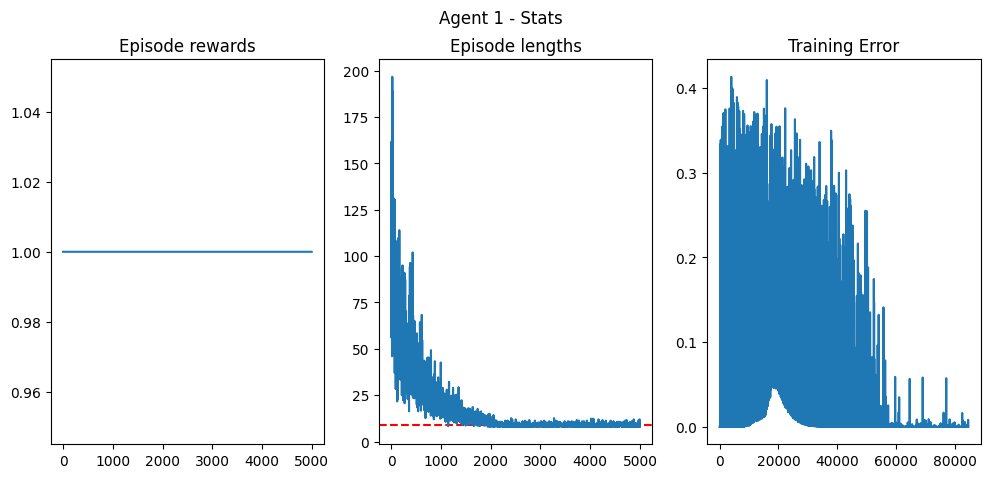

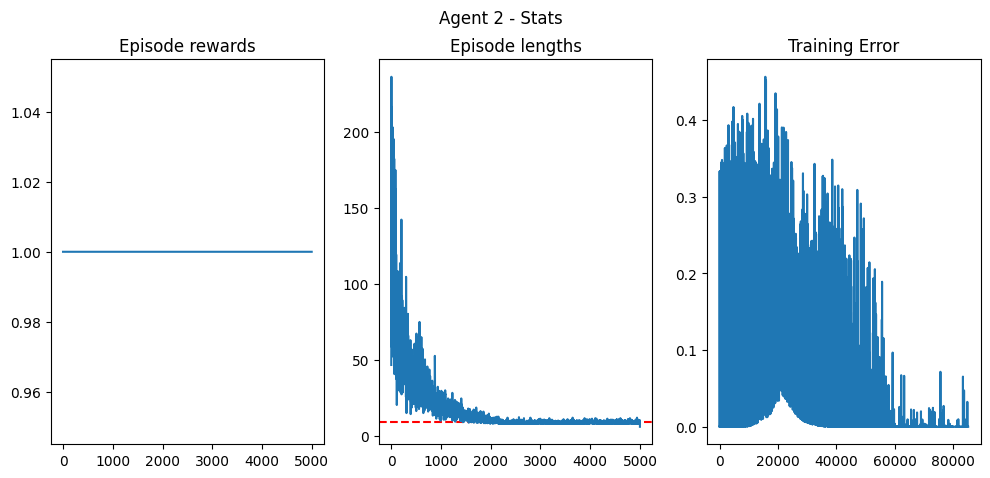

In [5]:
if train and show_stats:
    for i in range(len(agents_arr)):
        fig = agents_arr[i].plot_results()
        fig.suptitle(f'Agent {i+1} - Stats')
        plt.show()

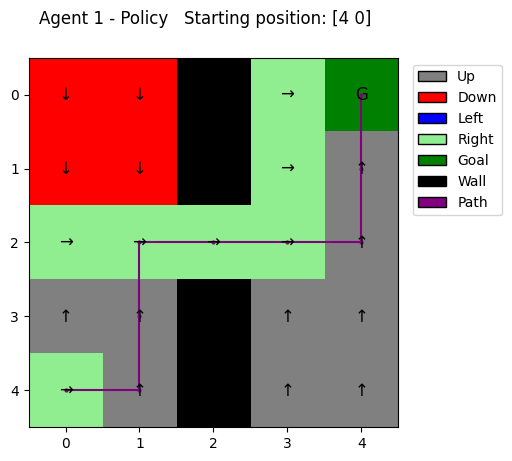

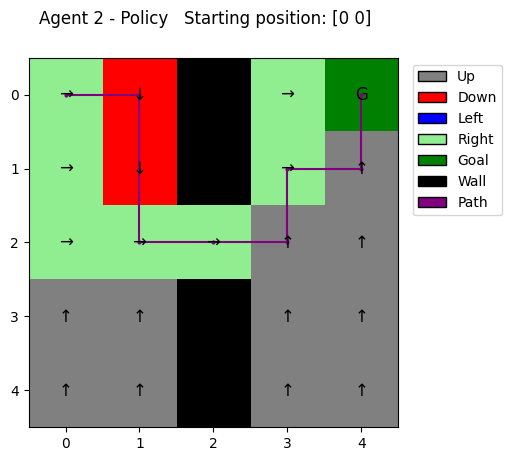

In [6]:
if train:
    for i in range(len(agents_arr)):
        value_grid, policy_grid, string_policy_grid = create_grids(env, agent=agents_arr[i])

        if export_to_JSON:
            writeJSON("Q-Learning", n_episodes, 0, shape, starting_positions[i], value_grid, policy_grid, string_policy_grid)
    
        if render:
            fig = plot_trajectory(string_policy_grid, starting_positions[i])
            fig.suptitle(f'Agent {i+1} - Policy   Starting position: {starting_positions[i]}')
            plt.show()